#### load Dependencies

In [9]:
import matplotlib.pyplot as plt
import math

#### load Dataset

In [10]:
X = [12.3,14.3,14.5,14.8,16.1,16.8,16.5,15.3,17.0,17.8,18.7,20.2,22.3,19.3,15.5,16.7,17.2,18.3,19.2,17.3,19.5,19.7,21.2,23.04,23.8,24.6,25.2,25.7,25.9,26.3]
y = [11.8,12.7,13.0,11.8,14.3,15.3,13.5,13.8,14.0,14.9,15.7,18.8,20.1,15.0,14.5,14.9,14.8,16.4,17.0,14.8,15.6,16.4,19.0,19.8,20.0,20.3,21.9,22.1,22.4,22.6]

In [11]:
print(len(X))

30


#### Split dataset into trainset and testset

In [12]:
X_train = X[0: 20]
y_train = y[0: 20]
n_train = len(X_train)

X_test = X[20:]
y_test = y[20:]
n_test = len(X_test)

#### Fit model y = w1*x + w2(x^2) + b

In [26]:
# parameters
w1 = -0.1
w2 = 0.3
b = 3
# hype-parameters
#lr = 0.0000001  #引入深度学习的一个方法，让模型来指定lr,w1和w2 用不同的lr
#这样的方法的名字叫Adamgrad
lr_w1 = 0.0
lr_w2 = 0.0
lr_b = 0.0

In [27]:
# epoches = 100000
epoches = 10000
for i in range(epoches):
    sum_w1 = 0.0
    sum_w2 = 0.0
    sum_b = 0.0
    for i in range(n_train):
        y_hat = w1 * X_train[i] + w2 * (X_train[i] ** 2) + b
        sum_w1 += (y_train[i] - y_hat) * (-X_train[i])
        sum_w2 += (y_train[i] - y_hat) * (-X_train[i] ** 2)
        sum_b += (y_train[i] - y_hat) * (-1)
    det_w1 = 2 * sum_w1
    det_w2 = 2 * sum_w2
    det_b = 2 * sum_b
    
#根据梯度来算lr，别问为什么，先这么写如下
    lr_w1 = lr_w1 + det_w1 ** 2
    lr_w2 = lr_w2 + det_w2 ** 2
    lr_b = lr_b + det_b ** 2
    
    w1 = w1 - (1 / math.sqrt(lr_w1) * det_w1)
    w2 = w2 - (1 / math.sqrt(lr_w2) * det_w2)
    b = b - (1 / math.sqrt(lr_b) * det_b)
    
  

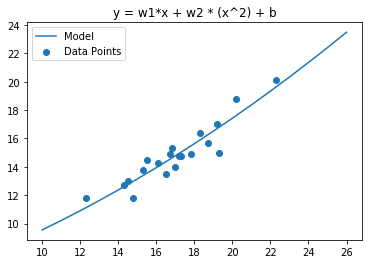

In [29]:
#画训练集中每个数据点
fig, ax = plt.subplots()
ax.scatter(X_train,y_train)
ax.plot([i for i in range(10, 27)],[w1 * i + w2 * ( i**2 ) + b for i in range(10, 27)])
plt.title('y = w1*x + w2 * (x^2) + b')
plt.legend(('Model','Data Points'),loc = 'upper left')
plt.show()

In [30]:
total_train_loss = 0
for i in range(n_train):
    y_hat = w1 * X_train[i] + w2 * (X_train[i] ** 2) + b
    total_train_loss += (y_train[i] - y_hat) ** 2

In [31]:
total_test_loss = 0
for i in range(n_test):
    y_hat = w1 * X_test[i] + w2 * (X_test[i] ** 2) + b
    total_test_loss += (y_test[i] - y_hat) ** 2

In [32]:
print(total_train_loss)

10.916934447202012


In [33]:
print(total_test_loss)

11.181267128791735


In [34]:
# 训练集上loss小，表现好。测试集上loss大，表现不好
# 这就是过拟合overfitting

In [36]:
# 引申：adamgrad 
# 1.model1 讲述了 y = w*x + b这个简单的线性回归模型，代码中lr学习率是自己初始化手动给的,epoches设定100来更新w参数。
# 2.model2 把模型添加了2次项 y = w1*x + w2*(x^2) + b,代码中lr学习率依旧是初始化手动给的，epoches设定的是100000来更新w参数，
#   测试集的损失函数远大于训练集的损失函数，说明模型过拟合。
# 3.接下来引入了adamgrad，这是深度学习中的一个方法，我们用在线性回归中，w = w - lr * det_w  b = b - lr * det_b，我们不能每次在
#   更新w参数w1，w2..wn以及b参数时都指定同样的lr，因为这样的lr给的不精确也有没针对性。我们根据梯度本身来计算lr，就是给w给其对应的lr
#     lr_w1 = lr_w1 + det_w1 ** 2
#     w1 = w1 - (1 / math.sqrt(lr_w1) * det_w1)
#   为什么这么做，在实际的项目和工业界，模型是非常复杂的，深度学习中一个函数的参数是成百上千甚至上万，手动给定lr没有任何意义，用adamgrad方法
#   很好的针对参数给定对应的lr学习率(超参数)。
#   model3 中通过adamgrad，epoches设定10000轮即可更新好w参数，对比训练集和测试集的损失函数，也相差很小。


In [37]:
# 如何理解 过拟合：
# 那我们先说拟合，直观的就是平面上有很多点，我们想用一个函数代表点分布的趋势。这就是拟合。
# 过拟合，那有些函数就能完全的穿过平面上所有的点，函数会很陡峭，这样的模型没法做预测，它是过拟合的，它的模型会很复杂，很高次，可以经过
# 图中所有点。这是比较直观的理解。
# 在实验中，我们可以通过对训练集的数据计算loss 和测试集的数据计算loss 来比较这两者直接的大小，相差过大就说明模型过拟合。
